# Box Office Analysis for Microsoft 

## 1. Business Understanding

### Introduction

Microsoft is a global leader in the technology sector. The company is known for its innovation and success in a wide range of digital services and products. Microsoft has proven itself capable of handling large- scale digital content and services through their success in the gaming industry via their product Xbox among others. 

The demand for film and television content demand has been on the rise.Among the chief drivers of this demand is the proliferation of smartphones and availability of streaming platforms to consume film and tv content via these devices. Streaming services such as Netflix, Amazon Prime and Hulu made a total of $25.2 billion in revenue in 2020. This shows a clear demand for this type of content. Other statistics also show the global box office revenue itself is projected to increase in the coming years. 

Microsoft  is well positioned to make a significant impact in the film industry given their extensive resources and wide range of technical expertise. However in an ever-competitive film industry, knowing which movies to produce that will capture audience interest is crucial. 
This project aims to assist Microsoft's new movie studio in making strategic decisions about which types of films to produce. By analyzing various aspects such as movie genres, budgets, and ratings, it aims to provide three insightful recommendations to the studio's executives, film producers, and creative team to help guide their movie production choices and strategies.


### Problem Statement 

Which films are doing well and why? What attributes affect the success of a movie? How can Microsoft Studio's executives use this analysis to inform their new movie studio?



### Defining the Metric for Success

This will be defined by creating three visualizations through our analysis that can be translated to three recommendations. These will be used by the head of Microsoft's new movie studio in informing what type of films the studio will create. 


# Data Understanding

The datasets used in this project come from reputable sources such as Box Office Mojo, IMDB, The Movie DB, and The Numbers, providing a comprehensive view of movie industry trends.
These are all reliable databases where information is regularly updated and the websites routinely maintained. 

Some data are missing, and not all data are uniform across different sources, which might have an impact on our analysis. This means that we will not be able to merge data from different data frames as they are from different sources.

The number of records in the data frames vary from 3387 records to 146144 records. These data frames contain both integer and object data types. Two of the dataframes in use in this analysis are from the same source. Some data frames contain columns where large amounts of data are missing. 

Overall, the datasets include important information about film budgets, genres, ratings, gross earnings, and more. This data allows us to analyze various aspects related to the profitability and popularity of different types of films. 





# Data Preparation

### Importing all the libraries that we will need to prepare our data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Loading our project data into pandas DataFrames  to read our data

In [2]:
# Loading project data into pandas DataFrames 
df_bom_gross = pd.read_csv('bom.movie_gross.csv.gz')
df_imdb_ratings = pd.read_csv('imdb.title.ratings.csv.gz')
df_imdb_basics = pd.read_csv('imdb.title.basics.csv.gz')
df_tn_movie_budgets = pd.read_csv('tn.movie_budgets.csv.gz')
df_tmdb_movies = pd.read_csv('tmdb.movies.csv.gz')



### Let's begin by understanding the shape of our dataframes. This will give us insight into how many entries and columns are in each df 

In [3]:
# Viewing the shape 
print ("Number of records in df_bom_gross: ", df_bom_gross.shape[0], ". It has", df_bom_gross.shape[1], "columns")
print ("Number of records in df_imdb_ratings: ", df_imdb_ratings.shape[0], ". It has", df_imdb_ratings.shape[1], "columns")
print ("Number of records in df_imdb_basics: ", df_imdb_basics.shape[0], ". It has", df_imdb_basics.shape[1], "columns")
print ("Number of records in df_tn_movie_budgets: ", df_tn_movie_budgets.shape[0], ". It has", df_tn_movie_budgets.shape[1], "columns")
print ("Number of records in df_tmdb_movies: ", df_tmdb_movies.shape[0], ". It has", df_tmdb_movies.shape[1], "columns")


Number of records in df_bom_gross:  3387 . It has 5 columns
Number of records in df_imdb_ratings:  73856 . It has 3 columns
Number of records in df_imdb_basics:  146144 . It has 6 columns
Number of records in df_tn_movie_budgets:  5782 . It has 6 columns
Number of records in df_tmdb_movies:  26517 . It has 10 columns


### Now let's take a look at the first five rows and last three rows of each data frame to get insight on the content of the dataframes

In [4]:
display (df_bom_gross.head())
display (df_imdb_ratings.head())
display (df_imdb_basics.head())
display (df_tn_movie_budgets.head())
display (df_tmdb_movies.head())

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [5]:
# Previewing the bottom of our dataset
display (df_bom_gross.tail(3))
display (df_imdb_ratings.tail(3))
display (df_imdb_basics.tail(3))
display (df_tn_movie_budgets.tail(3))
display (df_tmdb_movies.tail(3))

,title,studio,domestic_gross,foreign_gross,year
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


,tconst,averagerating,numvotes
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


### Let's get a summary of the information in our dataframes to give us a general idea pf the columns, counts and datatypes of othe data in our dfs

In [6]:
# Getting a summary of the dataframes
print (df_bom_gross.info())
print ("\n")

print (df_imdb_ratings.info())
print ("\n")

print (df_imdb_basics.info())
print ("\n")

print (df_tn_movie_budgets.info())
print ("\n")

print (df_tmdb_movies.info())
print ("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 

### Checking the numerical entries in the dataframe to identify any columns we expect to be classified under numerical columns but are not showing up.

In [7]:
# Checking whether each column has an appropriate datatype
display (df_bom_gross.describe())
display (df_imdb_ratings.describe())
display (df_imdb_basics.describe())
display (df_tn_movie_budgets.describe())
display (df_tmdb_movies.describe())

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

# Data cleaning 

### Now that we have a better understanding of what our data is looking like, we can proceed to cleaning it. Let's begin by identifying missing values.

In [8]:
# Identifying missing values in each df 
print ("Missing values in df_bom_gross:\n")
print (df_bom_gross.isnull().sum())
print ("\n")

print ("Missing values in df_imdb_ratings:\n") 
print(df_imdb_ratings.isnull().sum())
print ("\n")

print ("Missing values in df_imdb_basics:\n") 
print(df_imdb_basics.isnull().sum())
print ("\n")

print ("Missing values in df_tn_movie_budgets:\n") 
print (df_tn_movie_budgets.isnull().sum())
print ("\n")

print ("Missing values in df_tmdb_movies:\n") 
print(df_tmdb_movies.isnull().sum())
print ("\n")


Missing values in df_bom_gross:

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


Missing values in df_imdb_ratings:

tconst           0
averagerating    0
numvotes         0
dtype: int64


Missing values in df_imdb_basics:

tconst                 0
primary_title          1
original_title        22
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


Missing values in df_tn_movie_budgets:

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


Missing values in df_tmdb_movies:

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64




### Dealing with missing values 


Dealing with missing values for df_bom_gross

In [9]:
# Dealing with missing values in df_bom_gross
# Dropping the foreign_gross column because the missing values are about 40% of the total values in the column
df_bom_gross = df_bom_gross.drop(columns=['foreign_gross'])

# Replacing missing values in domestic_gross column
df_bom_gross['domestic_gross'] = df_bom_gross['domestic_gross'].fillna(df_bom_gross['domestic_gross'].median())

# Replacing missing values in studio column with unknwon because it is categorical not numeric
df_bom_gross['studio'] = df_bom_gross['studio'].fillna('Unknown')

# CHECKING FOR ANY REMAINING MISSING VALUES
print ("Missing values in df_bom_gross:\n")
print (df_bom_gross.isnull().sum())
 
display (df_bom_gross)


Missing values in df_bom_gross:

title             0
studio            0
domestic_gross    0
year              0
dtype: int64


,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


Dealing with missing values for  df_imdb_basics

In [10]:
# Dealing with missing values in df_imdb_basics

# Dropping rows that contain NaN values in 'original_title'
df_imdb_basics = df_imdb_basics.dropna(subset=['original_title'])

# Categorizing runtime minutes 
bins = [0, 60, 120, 180, np.inf]
names = ['IH', '1-2H', '2-3H', '3H+']

df_imdb_basics['runtime_category'] = pd.cut(df_imdb_basics['runtime_minutes'], bins, labels=names)
df_imdb_basics['runtime_category'] = df_imdb_basics['runtime_category'].cat.add_categories(['Unknown'])
df_imdb_basics['runtime_category'].fillna('Unknown', inplace = True)

# Dropping the runtime_minutes column 
df_imdb_basics = df_imdb_basics.drop('runtime_minutes', axis =1)

# Dropping rows with missing values in genre column
df_imdb_basics = df_imdb_basics.dropna (subset=['genres'])

# CHECKING FOR ANY REMAINING MISSING VALUES
print ("Missing values in df_imdb_basics:\n")
print (df_imdb_basics.isnull().sum())

display (df_imdb_basics)

Missing values in df_imdb_basics:

tconst              0
primary_title       0
original_title      0
start_year          0
genres              0
runtime_category    0
dtype: int64


,tconst,primary_title,original_title,start_year,genres,runtime_category
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",2-3H
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama",1-2H
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,2-3H
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama",Unknown
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",1-2H
...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,"Adventure,History,War",Unknown
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,Drama,2-3H
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary,Unknown
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,Comedy,Unknown


Merging the two imdb dataframes for easier analysis on the 'tconst' column 

In [11]:
# Merging df_imdb_basics and df_imdb_ratings on 'tconst'
df_imdb = df_imdb_basics.merge(df_imdb_ratings, on='tconst', how='inner')
display (df_imdb)

,tconst,primary_title,original_title,start_year,genres,runtime_category,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",2-3H,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama",1-2H,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,2-3H,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama",Unknown,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",1-2H,6.5,119
...,...,...,...,...,...,...,...,...
73047,tt9913056,Swarm Season,Swarm Season,2019,Documentary,1-2H,6.2,5
73048,tt9913084,Diabolik sono io,Diabolik sono io,2019,Documentary,1-2H,6.2,6
73049,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,"Drama,Family",1-2H,8.7,136
73050,tt9914642,Albatross,Albatross,2017,Documentary,Unknown,8.5,8


Dealing with missing values in df_tn_movie_budgets

In [12]:
# Converting column in df_tn_movie_budgets dataframe from string to numeric format 

df_tn_movie_budgets ['production_budget'] = df_tn_movie_budgets ['production_budget'].str.replace('\$|,', '', regex=True).astype(float).astype(int)
df_tn_movie_budgets['domestic_gross'] = df_tn_movie_budgets['domestic_gross'].str.replace('\$|,', '', regex=True).astype(float).astype(int)
df_tn_movie_budgets['worldwide_gross'] = df_tn_movie_budgets['worldwide_gross'].str.replace('\$|,', '', regex=True).astype(float).astype(int)



In [13]:
display (df_tn_movie_budgets.head())
display (df_tn_movie_budgets.describe())

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,-2147483648
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,8.988256e+07
std,28.821076,4.181208e+07,6.824060e+07,1.738874e+08
min,1.000000,1.100000e+03,0.000000e+00,-2.147484e+09
25%,25.000000,5.000000e+06,1.429534e+06,4.102274e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.794748e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.758278e+07
max,100.000000,4.250000e+08,9.366622e+08,2.053311e+09


In [14]:
# Remove rows where 'worldwide_gross' is less than 0
df_tn_movie_budgets = df_tn_movie_budgets[df_tn_movie_budgets['worldwide_gross'] >= 0]


# Data Analysis

## Which genres have the highest average ratings?

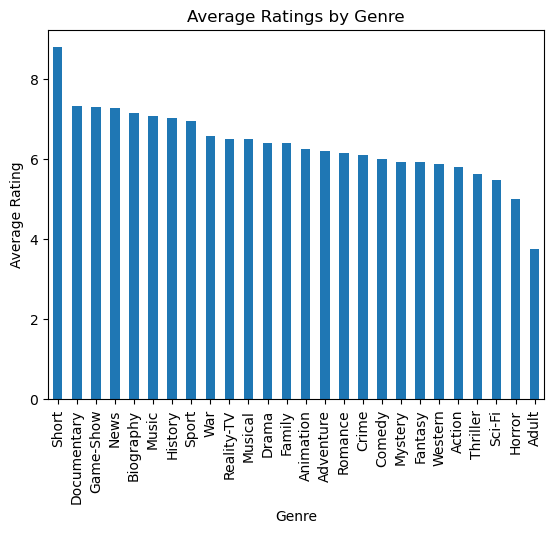

In [15]:
# Splitting the genres into seperate rows where they are separated by commas
df_imdb['genres'] = df_imdb['genres'].str.split(',')
df_imdb = df_imdb.explode('genres')

# Calculating the average ratings for each genre 
genre_ratings = df_imdb.groupby('genres')['averagerating'].mean()

# Plot the data
genre_ratings.sort_values(ascending=False).plot(kind='bar')

plt.title('Average Ratings by Genre')

plt.xlabel('Genre')
plt.ylabel('Average Rating')

plt.show()


## How does the length of a movie correspond to its average rating?

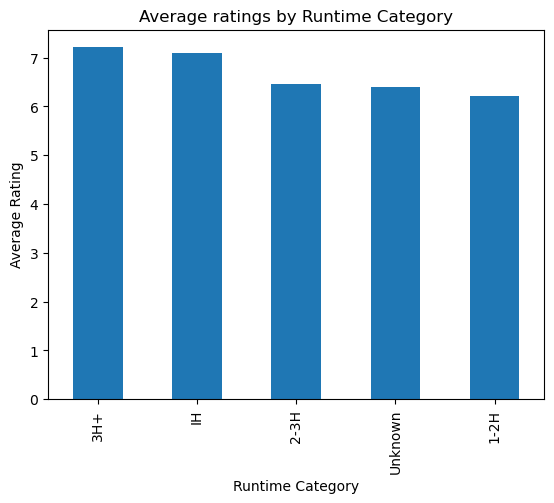

In [16]:
runtime_ratings = df_imdb.groupby('runtime_category')['averagerating'].mean()


#Plotting the data
runtime_ratings.sort_values(ascending=False).plot(kind='bar')
plt.title('Average ratings by Runtime Category')

plt.xlabel('Runtime Category')
plt.ylabel('Average Rating')
plt.show()

## What is the relationship between the Production Budget and Domestic Gross?

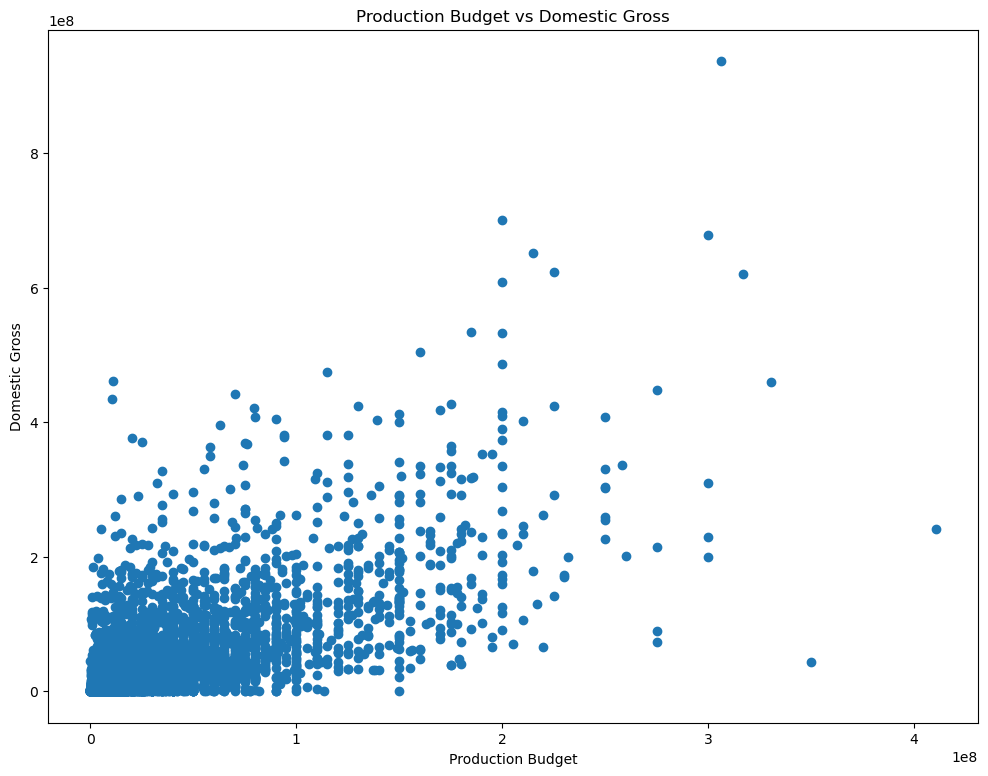

In [17]:
#Plotting the data to view the relationships in df_tn_movie_budgets
plt.figure(figsize=(12,9))
plt.scatter(df_tn_movie_budgets['production_budget'], df_tn_movie_budgets['domestic_gross'])
plt.title('Production Budget vs Domestic Gross')
plt.xlabel('Production Budget')
plt.ylabel('Domestic Gross')
plt.show()

## What is the relationship between the Production Budget and Worldwide Gross?

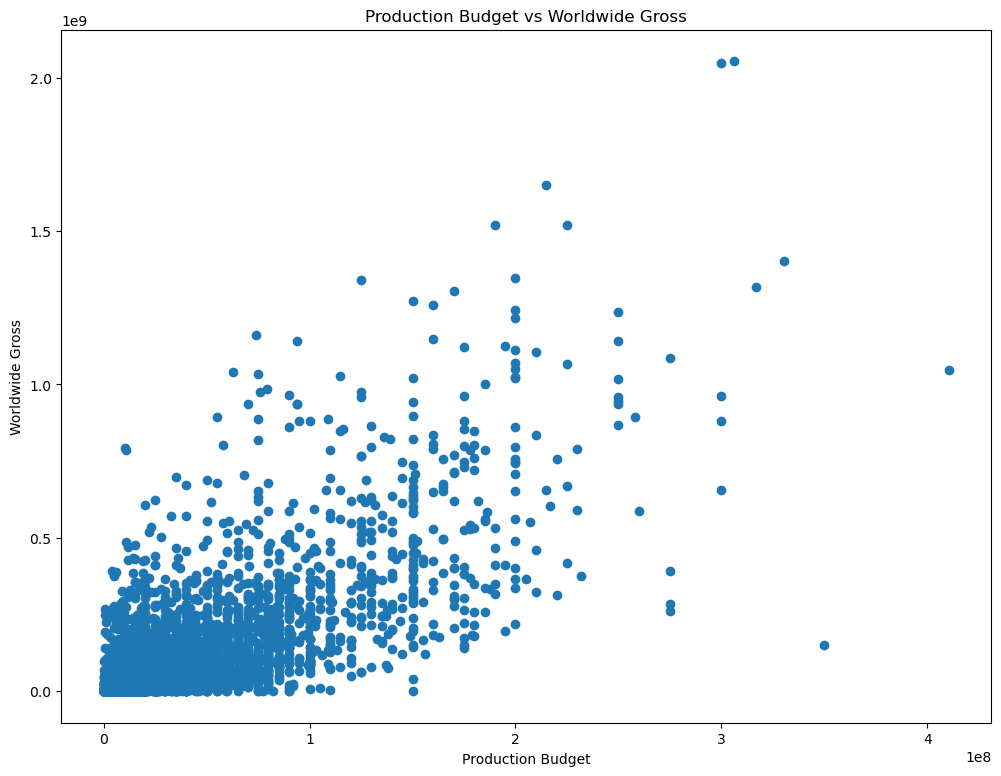

In [18]:
# Production Budget vs Worldwide Gross
plt.figure(figsize=(12,9))
plt.scatter(df_tn_movie_budgets['production_budget'], df_tn_movie_budgets['worldwide_gross'])
plt.title('Production Budget vs Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.show()


## How does the month when the movie is released relate with the popularity of the movie?

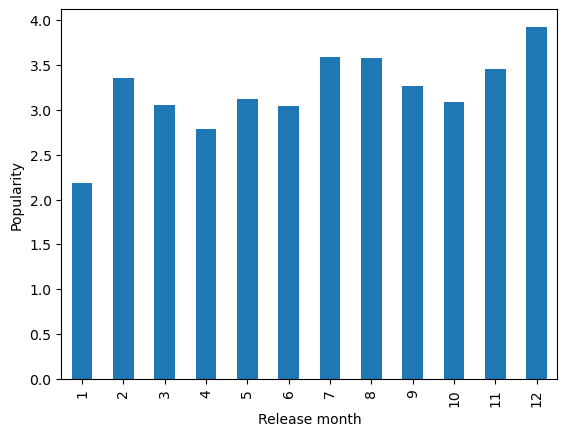

In [21]:
# Checking if the 'release_date' is in datetime format
df_tmdb_movies['release_date'] = pd.to_datetime (df_tmdb_movies['release_date'])

# Extracting the month from each date
df_tmdb_movies['release_month'] = df_tmdb_movies['release_date'].dt.month

# Group by month and calculae mean popularity
mean_popularity_by_month = df_tmdb_movies.groupby('release_month')['popularity'].mean()

# Plotting the data
mean_popularity_by_month.plot(kind='bar')
plt.xlabel('Release month')
plt.ylabel('Popularity')
plt.show()


## 7. Findings and visuals 

### Analysing the relationship between the genres and the ratings 
>The barplot for average rating and the genre of movies showed that short films, documentaries and game-shows were the top 3 most highly rated while the Sci-Fi, Horror and Adult genres were the most lowly rated films according to the imdb database.

### Analysing the relationship between the runtime category and the average rating 
>From the bar plot, we can determine that films that are 3+hours long and around 1 hour long tend to get higher ratings.

### Analysing the relationship between the production budget and the gross (both domestic and worldwide) of the films
>The two scatterplots show positive correlation which suggests that investing more could potentially lead to higher earnings.

### Analysing the release month and the popularity of the movie 
> This barplot showed that December is the most preferred time to release movies. However, this could be because of the type of movies that are usually released during the holiday season and tend to have a higher popularity. It is also a time of the year when people are home more and thus consume for film and television content leading to higher popularity ratings.

## 9. Business Recommendation

The three business recommendations that could be derived from our analysis are:
> Invest in Documentaries and Short films: These genres show the highest average ratings. Microsoft could consider creating content in these genres to attract viewership and positive reviews, which could lead to higher overall visibility and success.

>Consider longer runtimes for higher ratings: Films that are 3+ hours long and around 1 hour long tend to get higher ratings. Depending on the type of content Microsoft plans to produce, they may want to consider these lengths to attract viewership and positive reviews.

>Balance the Production Budget: There is a positive correlation between 
production budget and gross earnings (both domestic and worldwide). This suggests that investing more in production could potentially lead to higher earnings. However, this correlation is not very strong, implying that a high production budget does not guarantee high returns. Microsoft should balance their production budget, ensuring that they have enough budget for marketing and other post-production activities.

